# Gradient descent for Linear Regression

Now that you have learned how Gradient Descent works, let's use it to find the parameters of Linear Regression. Let's fit the linear regression on the same [Advertisesment Dataset](https://www.statlearning.com/s/Advertising.csv), but this time using Gradient Descent.

Let's import the necessary libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"


# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


This is a multiple Linear Regression problem with three independent variables: TV , radio and newspaper and one dependent variable: sales. There are 200 samples in the dataset *ie.* $n = 200$

This multiple linear regression problem can be represented in matrix form as:

$$\mathbf{\hat{y}} = \mathbf{X} \boldsymbol{\beta}$$

$$\begin{bmatrix}
\hat{y_1} \\
\hat{y_2} \\
\vdots \\
\hat{y_{200}}
\end{bmatrix} =   \begin{bmatrix}
  1 & x_{1\ 1} & x_{1\ 2} & x_{1\ 3} \\
  1 & x_{2\ 1} & x_{2\ 2} & x_{2\ 3} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{200\ 1} & x_{200\ 2} & x_{200\ 3}
 \end{bmatrix} \times \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3
\end{bmatrix}$$


The predicted output for the samples can be computed as:
\begin{align*}\hat{y_1} &= \beta_0x_{1\ 0}+ \beta_1x_{1\ 1} + \beta_2x_{1\ 2} + \beta_3 x_{1\ 3}\\
\hat{y_2} &= \beta_0x_{2\ 0}+ \beta_2x_{2\ 1} + \beta_2x_{2\ 2} + \beta_3 x_{2\ 3}\\
\hat{y_3} &= \beta_0x_{3\ 0}+ \beta_1x_{3\ 1} + \beta_2x_{3\ 2} + \beta_3 x_{3\ 3}\\
.\\
.\\
.\\
.\\
\hat{y_{200}} &= \beta_0x_{200\ 0}+ \beta_1x_{200\ 1} + \beta_2x_{200\ 2} + \beta_3 x_{200\ 3}
\end{align*}


Generalizing, for any $i^{th}$ sample, predicted output can be computed as:

$$\hat{y_i} = \beta_0x_{i\ 0}+ \beta_1x_{i\ 1} + \beta_2x_{i\ 2} + \beta_3 x_{i\ 3}$$
 where for all $i$ = $1$ to $n$, $x_{i0} =1$



The following block of codes creates a matrix $\mathbf{X}$ containing the features of all the samples and a vector $\mathbf{y}$ containing their corresponding outputs. It also assigns the number of samples to $n$ and the number of features to $d$.

In [3]:
# Feature matrix
X = data_df[['TV', 'radio', 'newspaper']].values

# Adding the column of ones in X
X = np.c_[np.ones((X.shape[0],1)),X]

# Outputs
y = data_df['sales'].values.reshape(-1,1)

n = X.shape[0] # number of samples (rows)
d = X.shape[1] # number of features (columns)

## Random Initialization


Let's initialize the values of parameters randomly. The function `initialize_beta` uses the [`numpy.random.randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) function to initialize the parameters using the random values sampled from **standard normal distribution**. It returns an array of the shape $d\times 1$ (where $d$ = no. of features) containing the initial values of the parameters. In our case $d=4$ (including the ones column).


In [4]:
def initialize_betas(X, y):
  np.random.seed(0)
  betas = np.random.randn(d,1)
  return betas

betas = initialize_betas(X, y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


Here, the initial values for our parameters are:

$$\boldsymbol{\beta} =\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3
\end{bmatrix} =   \begin{bmatrix}
  1.7640\\
  0.4001\\
  0.9787\\
  2.2408
 \end{bmatrix}$$

## Cost Function

In OLS, you minimized the sum of squared error (SSE). Here you will be minimizing the cost function. The cost function $J(.)$ is nothing but the sum of squared error multiplied by $\frac{1}{2}$ to make the derivation easier. You should know that multiplying the cost function with $\frac{1}{2}$ only changes the value of the cost function but not the optimal parameters that minimize it.

\begin{align*}
J(\beta_0, \beta_1, \beta_2, \beta_3) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}((\beta_0x_{i0}+\beta_1x_{i1} +\beta_2x_{i2} + \beta_3x_{i3})-y_{i})^2
\end{align*}

The cost function can be written in matrix form as:

$$J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2$$


*Note: We call $J$ as a function of only parameters $\boldsymbol{\beta}$ but not of $X$ and $y$ because $X$ and $y$ are constants given by the dataset. So the value of $J$ depends only on the parameters.*

**You want to find the parameters $\beta_0, \beta_1, \beta_2$ and $\beta_3$ that minimizes the cost function $J$ using Gradient Descent.**


The `calculate_cost` function below calculates the cost function for a particular set of values of parameters `betas`.

In [5]:
def calculate_cost(betas):
  cost = 1/2 * np.sum(np.square(np.dot(X, betas)-y))
  return cost

print("Cost with random betas:", calculate_cost(betas))

Cost with random betas: 2303714.226243876


## Gradients


You will need to calculate the gradient of the cost function with respect to each of the parameters.

Partial derivative(gradient) of the cost function with respect to $\beta_1$,

\begin{align*}
\frac{\partial J}{\partial \beta_1} &= \frac{\partial}{\partial \beta_1}\ \frac{1}{2}\ \sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2\\
&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial}{\partial \beta_1}(\hat{y_{i}}-{y_{i}})^2
\end{align*}

Applying chain rule,

\begin{align*}
\hspace{8cm}&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial (\hat{y_{i}}-{y_{i}})^2}{\partial (\hat{y_{i}}-{y_{i}})} \times \frac{\partial (\hat{y_{i}}-{y_{i}})}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times \frac{\partial (\beta_0x_{i0} + \beta_1x_{i1} + \beta_2x_{i2} + \beta_3x_{i3})-y_i)}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times x_{i1}\\
\therefore \frac{\partial J}{\partial \beta_1}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i1}
\end{align*}

Similarly,

\begin{align*}\frac{\partial J}{\partial \beta_0}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i0}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})\times 1\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})
\end{align*}


$$\frac{\partial J}{\partial \beta_2}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i2}$$

$$\frac{\partial J}{\partial \beta_3}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i3}$$



In general, the formula for calculating the gradients with respect to a parameter $\beta_j$ can be expressed as:

$$\frac{\partial J}{\partial \beta_j}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{ij}$$


We can write this generalized expression in matrix form to calculate the gradients wrt. all the parameters simultaneously as:

$$\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y}) = \begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
\frac{\partial J}{\partial \beta_2}\\
\frac{\partial J}{\partial \beta_3}
\end{bmatrix} $$

The `calculate_gradient` function below calculates the gradients of cost function with respect to the parameters `betas`. It uses the matrix operations to compute the gradient of all the parameters simultaneously.

In [6]:
def calculate_gradients(betas):
  gradients = np.dot(X.T,(np.dot(X,betas)-y))
  return gradients

print("Gradients for random betas = \n", calculate_gradients(betas))

Gradients for random betas = 
 [[  27563.85598559]
 [4631129.37253468]
 [ 731917.2683292 ]
 [1079270.65268036]]


Here, the gradients of the cost function with respect to the initial parameters are:

$$\boldsymbol{\frac{\partial J}{\partial \beta}}  =\begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
\frac{\partial J}{\partial \beta_2}\\
\frac{\partial J}{\partial \beta_3}
\end{bmatrix} = \begin{bmatrix}
27563.85 \\
4631129.37\\
731917.26\\
1079270.65
\end{bmatrix}$$

You can see that the gradients for different parameters vary quite largely. The parameters corresponding to the features having larger values have larger gradients and the parameters corresponding to the features having smaller values have smaller gradients. For example, the gradients with respect to the parameter corresponding to the feature 'TV', $\frac{\partial J}{\partial \beta_1}$ is larger than the ones corresponing to the 'radio', $\frac{\partial J}{\partial \beta_2}$.

## Gradient Descent

Now you need to update the parameters using their respective gradients until the cost function converges to its minimum value.


${\hspace{5cm}}\text{Repeat until convergence }\{$

$$\beta_0 :=\beta_0-\alpha\frac{\partial J}{\partial \beta_0}$$

$$\beta_1 :=\beta_1-\alpha\frac{\partial J}{\partial \beta_1}$$

$$\beta_2 :=\beta_2-\alpha\frac{\partial J}{\partial \beta_2}$$

$$\beta_3 :=\beta_3-\alpha\frac{\partial J}{\partial \beta_3}$$

${\hspace{8cm}}\}$




Since you already have a vector $\beta$ called `beta` containing parameters and an another vector $\frac{\partial J}{\partial \beta}$ called `gradients` containing the gradients of cost function with respect to the parameters, this updation is a simple matrix operation:

$$\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \boldsymbol{\frac{\partial J}{\partial \beta}}$$

The `gradient_descent` function below applies the gradient descent algorithm to find the optimal parameters `betas` that minimize the cost function. Initially `betas` contain the random initial values of the parameters. It uses the gradients calculated by the `calculate_gradients` function to update the values of the parameters. The default learning rate is set to `alpha=0.003`. The process of updating the parameters is repeated till the cost function decreases by a certain threshold value `precision` or the maximum number of iterations `max_iters` is not reached. Also the list `costs`  contains the values of cost functions for different values of parameters.

In [7]:
def gradient_descent(X, y, alpha=0.003 , max_iters=10000, precision = 1e-3):
  iteration = 0 # no. of iterations
  difference = 1
  betas = initialize_betas(X,y) # random initial values of the parameters
  cost = calculate_cost(betas) # cost for the initial values pf parameters
  costs = [calculate_cost(betas)] # list containing the history of costs for different iterations

  while difference > precision and iteration <= max_iters :
    # updating the values of parameters
    betas = betas - alpha * calculate_gradients(betas)

    # cost for the new values of parameters
    cost = calculate_cost(betas)

    # difference between the cost of current iteration and previous iteration
    difference = np.abs(costs[iteration] - cost)
    costs.append(cost)

    print("iteration: {}, cost: {}".format(iteration, cost))
    iteration += 1

    if(cost == np.infty):
      print("Cost reached infinity, try smaller learning rate")
      break

  return betas, iteration, costs

Let's use the `gradient_descent` function defined above to learn the parameters for our multiple linear regression model.

In [8]:
betas, steps, costs = gradient_descent(X, y)

iteration: 0, cost: 624562462609042.5
iteration: 1, cost: 2.04188800865341e+23
iteration: 2, cost: 6.6765064007188725e+31
iteration: 3, cost: 2.1830649810113783e+40
iteration: 4, cost: 7.138123481955464e+48
iteration: 5, cost: 2.3340032150596278e+57
iteration: 6, cost: 7.631657005765796e+65
iteration: 7, cost: 2.49537739613466e+74
iteration: 8, cost: 8.159313690900017e+82
iteration: 9, cost: 2.6679090709738826e+91
iteration: 10, cost: 8.723452830258335e+99
iteration: 11, cost: 2.852369674426849e+108
iteration: 12, cost: 9.326596839463841e+116
iteration: 13, cost: 3.0495839787448193e+125
iteration: 14, cost: 9.971442535251373e+133
iteration: 15, cost: 3.2604337813561245e+142
iteration: 16, cost: 1.0660873193649929e+151
iteration: 17, cost: 3.4858618476162103e+159
iteration: 18, cost: 1.1397971441874089e+168
iteration: 19, cost: 3.726876126161402e+176
iteration: 20, cost: 1.2186033041567317e+185
iteration: 21, cost: 3.984554255714459e+193
iteration: 22, cost: 1.3028581625025874e+202
iter

C:\Users\ACER\AppData\Local\Temp\ipykernel_22964\3834816075.py:2: RuntimeWarning: overflow encountered in square
  cost = 1/2 * np.sum(np.square(np.dot(X, betas)-y))


As you can see the default learning rate of `alpha=0.003` seems to be very large for this problem. The reason behind this is that the value of the gradients are very large. When the parameters are updated using these gradients, the parameters too get large values. After some iterations the cost function calculated using these parameters reach infinity.

A possible solution to this is scaling the features to small values about which we will learn  in the next chapter. For now, let's further decrease the value of learning rate to `alpha=0.0000003`

In [9]:
betas, steps, costs = gradient_descent(X, y, alpha=0.0000003)

iteration: 0, cost: 1605439.1704912465
iteration: 1, cost: 1139934.3901561839
iteration: 2, cost: 827385.9388970847
iteration: 3, cost: 615561.209976966
iteration: 4, cost: 470257.5167967307
iteration: 5, cost: 369060.20773126744
iteration: 6, cost: 297263.3981504862
iteration: 7, cost: 245203.88220357374
iteration: 8, cost: 206518.51314390055
iteration: 9, cost: 177005.05468340195
iteration: 10, cost: 153877.40255986893
iteration: 11, cost: 135278.53927748697
iteration: 12, cost: 119961.93545091985
iteration: 13, cost: 107083.05179937743
iteration: 14, cost: 96062.81371070776
iteration: 15, cost: 86498.14156564066
iteration: 16, cost: 78103.25292282502
iteration: 17, cost: 70671.09390908064
iteration: 18, cost: 64047.943533163925
iteration: 19, cost: 58116.64362275175
iteration: 20, cost: 52785.481359982216
iteration: 21, cost: 47980.78022772065
iteration: 22, cost: 43641.92759428901
iteration: 23, cost: 39718.00667002998
iteration: 24, cost: 36165.48787214866
iteration: 25, cost: 329

If we plot the cost function $J$ against the number of iteration, we get a plot as shown below.


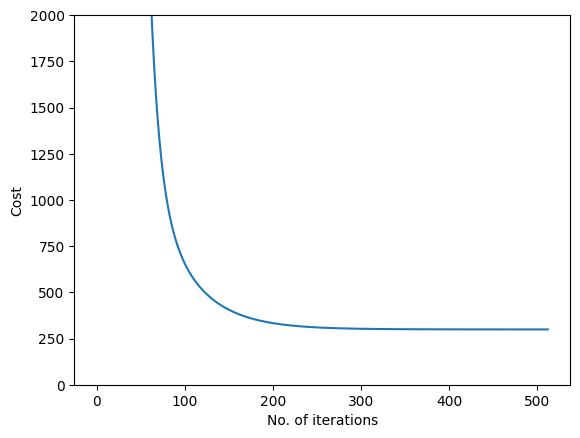

In [10]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()

As you can see, the cost function $J$ decreases with number of iterations and finally saturates around $299$ in $511^{th}$ iteration.

Let's see the optimal parameters found by Gradient Descent algorithm.

In [11]:
from IPython.display import display, HTML
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))

*TV, radio* and *newspaper* are the input variables, $x_1, x_2$ and $x_3$ respectively and _sales_ is the output variable, $y$. We obtain a multiple linear regression model of $y = 1.75 + 0.05x_{1} + 0.20x_{2} + 0.01x_{3}$. Note that each of the estimated model parameters (i.e., $\beta_{0}$ through $\beta_{3}$) have been rounded to 2 decimal places.. Intercept, $\beta_0$ has been estimated as $1.75$ and three regression coefficients, $\beta_1$, $\beta_2$ and $\beta_3$ have been estimated to $0.05$, $0.20$,  and $0.01$ respectively.

You might have noticed that the parameters found by Gradient Descent are similar but not exactly the same as that found by OLS. This is because the Gradient Descent depends on the factors such as the learning rate and the number of iterations for which it runs. Selection of these factors heavily affects the solution that the Gradient Descent finds.

*You can play around with the learning rate and the number of iterations and see if the soilution matches to that of OLS*

## Comparison with Ordinary Least Squares method



While both of the techniques find the parameters that minimize the cost function, their approach is quite different. As mentioned earlier, Ordinary Least Squares (OLS) is a direct method to find the optimal parameters whereas the Gradient Descent is an iterative method. This is the main difference between the two approaches. Few other points that differentiate the two approaches are:

* You don't need to choose any hyperparameter in OLS whereas Gradient Descent requires you to choose a learning rate and the number of iterations.

* OLS requires the number of samples $n$ to be greater than the number of features $d$. Also it requires $(\mathbf{X}^{T}\mathbf{X})^{-1}$ to exist. However, there are no such constraints in Gradient Descent.

* If the constraints of OLS are met then it always gives the exact solution. Whereas the solution provided by the Gradient descent is dependent on the learning rate and the number of iterations and may not always be exact.

* The time complexity of OLS is $O(d^3)$ whereas the time complexity of Gradient Descent is $O(kd^2)$ where $k$ is the number of iterations. So if the number of features is large (exceeding $10,000$), then its a good idea to choose Gradient Descent.





## Key Takeaways

* Gradient of the cost function w.r.t each of the parameters can be derived easily using calculus.

* The parameters are updated iteratively using their corresponding gradients.

* When the dataset is large with a large number of features, Gradient descent is preferred instead of OLS.
of the function.
